(labs:cor21)=
# Convolution

<hr>

## 📌 Commentaires pour les intervenants

* Conseillez aux étudiants de représenter les PSF, en plus du résultat de la convolution.
  Laissez-les réfléchir un peu pour savoir comment ils peuvent s'y prendre
  (sachant que pour la gaussienne, on n'utilise pas une matrice, mais la fonction `gaussian`).
  L'idée est de convoluer un dirac (qu'il faut alors créer !).
  Cette idée est donnée dans la correction.

* Beaucoup d'étudiants risque de ne pas oublier les deux paires de crochets pour définir la deuxième PSF : `h = np.array([[1, -1]])`.
  Dans ce cas, on peut leur donner la solution assez rapidement.
  
* Ils peuvent également essayer d'utiliser d'autres PSF.

<hr>

In [2]:
import numpy as np
import scipy as sp
import skimage as ski
import skimage.io as io
import skimage.filters as flt
import matplotlib.pyplot as plt

## Objectives

* know how to use the function `scipy.ndimage.convolve` to apply the convolution product
* be able to identify the kernel applied on a convolved image

## The point spread functions

Before convolving the image by the different filters, it is interesting to display the filters themselves.
In case there is no explicit matrix to represent a filter, as with the Gaussian filter `skimage.filters.gaussian`,
we can simply convolve the filter by an image containing only one non-zero pixel.
Indeed, this image is equivalent to a Dirac pulse $\delta$ which is the neutral element of the convolution product.

The two last kernels are defined with (note the double brackets, so as to get a 2D array):

In [3]:
h = np.array([[1, -1]])

and

In [4]:
N = 30
h = np.ones((1,N)) / N

## The convolutions

The results of the convolutions are shown below, for both the "Dirac pulse" and the smiley.

In [7]:
# Filtres à appliquer

def identity(f):
    return f

def gauss(f):
    return flt.gaussian(f,4)

def diff(f):
    h = np.array([[1, -1]])
    return sp.ndimage.convolve(f, h)

def mouv(f):
    N = 30 # longueur du filtre
    h = np.ones((1,N)) / N
    return sp.ndimage.convolve(f, h)

def duplicate(f):
    h = np.zeros((10,1))
    h[0,] = 1
    h[9,] = 1
    return sp.ndimage.convolve(f, h)

# Dictionnaire des convolutions
convs = {
    "Image": identity,
    "Gaussian blur": gauss,
    "Gradient": diff,
    "Motion blur": mouv,
    #"Dédoublement": duplicate
}

K = len(convs)

In [8]:
# Images

# Dirac
img1 = np.zeros((100,100))
img1[50,50] = 1

# Smiley
img2 = io.imread('smiley.png')
img2 = ski.img_as_float(img2)

# Liste des images
images = [img1, img2]

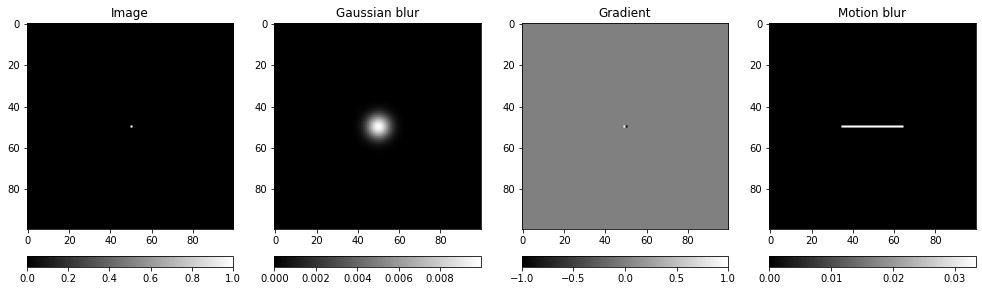

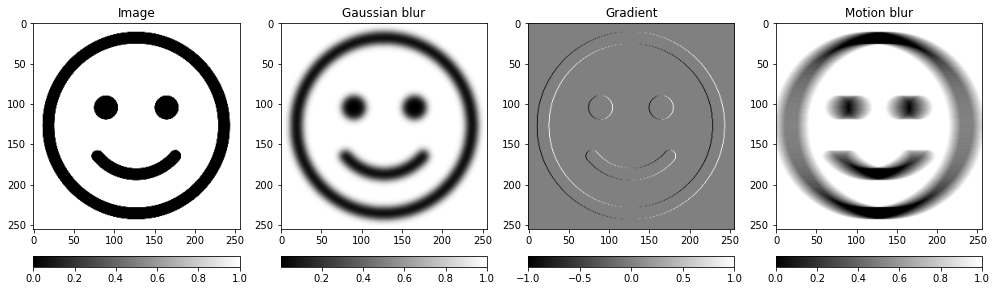

In [13]:
# Convolutions

# Boucle sur les images
for f in images:
    
    # Nouvelle figure
    fig = plt.figure(figsize=(17,10))
    i = 0
    
    # Boucle sur les convolution
    for name,c in convs.items():

        i = i + 1
        ax = plt.subplot(1,K,i)
        psm = plt.imshow(c(f), cmap="gray")
        plt.title(name)
        fig.colorbar(psm, ax=ax, orientation="horizontal",
                     pad = 0.05, shrink=1.0)

The function `skimage.filters.gaussian` defines a Gaussian kernel (this is the second image above).
The result of the function is the convolution product of this Gaussian kernel with the image given as a parameter of the function.

The "gradient" image (third image) brings out the vertical contours of the image.
We will reuse this filter in [Edge detection](C:edge-detection).

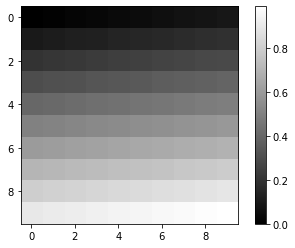

In [19]:
import matplotlib.pyplot as plt
import numpy as np

img = np.arange(100).reshape((10, 10))/100

plt.figure()
im = plt.imshow(img, "gray")
plt.colorbar(im)
plt.show()